# Prior estimation

In [6]:
using Revise

In [7]:
import ObjectiveEmpiricalBayes: OptConfig, FEModel, generatedata, cvreference, ReferenceRegularizer, cvscore, ebprior
import Distributions: Uniform
using Random: seed!

using PyPlot

OPTCONFIG=OptConfig(MAXEVAL=10000, XTOLREL=1e-8, DEBUG=false);
linspace(x...) = LinRange(x...) |> collect

linspace (generic function with 1 method)

## The Model

In [8]:
n = 200
ndata = 100
σ = .5
prior = Uniform(0,2)

Uniform{Float64}(a=0.0, b=2.0)

In [9]:
seed!(5)
m = FEModel(f=x->x, xs=linspace(0,2,n), σ=σ) 
mt = FEModel(f=x->x, xs=linspace(0,1,n), σ=σ) # model with restricted domain
d = generatedata(m, prior, ndata);

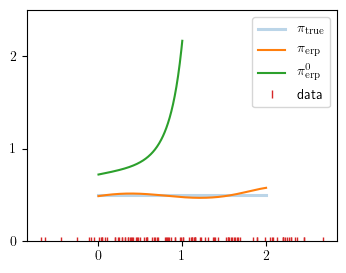

In [10]:
regR = 1
wr  = ebprior(m,  d, ReferenceRegularizer(m,  regR), OPTCONFIG)
wrt = ebprior(mt, d, ReferenceRegularizer(mt, regR), OPTCONFIG)

PyPlot.rc("text",usetex=true)

figure(figsize=(4,3))
plot([0,2],[0.5,.5], label="\$\\pi_{\\rm true}\$", alpha=.3, linewidth=2.2)
plot(m.xs, wr/2*n, label="\$\\pi_{\\rm erp}\$")
plot(mt.xs, wrt*n, label="\$\\pi^0_{\\rm erp}\$")
plot(d, zero(d), marker="|", linestyle=" ", label="data")

ylim(0,2.5)

yticks([0,1,2])
xticks([0,1,2])
legend()
#vlines(0,1,2)
savefig("plots/counterex.pdf", bbox_inches="tight")
p=gcf();